## Simple k-means clustering algorithm for 2D data
This is simply meant to show the inner workings of the k-means clustering unsupervised technique with a simple dataset of two features and two classes for clear visualization. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import latex
import random

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # 2x features
y = iris.target

In [3]:
# Saving only two classes within the dataset
X = X[:100]
y = y[:100]

In [4]:
y[0]

0

In [5]:
X[0]

array([5.1, 3.5])

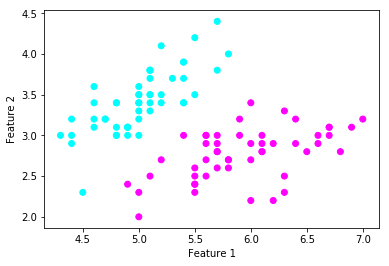

In [6]:
# Visualizing the data - it seems that this data could be clustered into coherent groups
plt.scatter(X[:,0],X[:,1],c=y,cmap="cool")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### To show the clustering process I will show the cluster centroids along with the data

- I will be using random initialization where the two cluster centroids will each be randomly initialized to an individual data point.
- The process of learning will involve:
    - Stepping though all training examples and assigning them to one of the centroids which it is closest to, defined by squared distance
    - The centroids will be updated to the average of the points assigned to it.
    - This process will continue iteratively until the centroids are at their optimum position.
    
#### Optimization Objective:
$$ \frac{1}{m}\sum_{i=1}^{m} || x^{(i)} - \mu_{c}^{(i)} || $$
- m: training examples
- x<sup>(i)</sup>: training example i
- mu_c<sup>(i)</sup>: centroid assigned to training example i

In [7]:
# Defining the random initialization of the centroids for the model
# Returns the index of data points to assign centroids to
def random_init(num_examples, num_clusters, X):
    init_positions = []
    for i in range(num_clusters): # initializing all centroids
        cent_pos = random.randint(0,num_examples-1) # index
        cent_pos = X[cent_pos] # actual centroid value
        init_positions.append(cent_pos)
    return init_positions

In [8]:
# Calculates the average of the points that are assigned to the centroid and updates centroids
def update_centroid_position(cent_one,cent_two):
    """
    cents: list of two centroids of shape (1,2)
    cent_one, cents_two: data points assigned to both centroids
    """
    cent_one = np.array(cent_one) # change list of data to array
    cent_two = np.array(cent_two)
    
    c_one_x = np.average(cent_one[:,0])
    c_one_y = np.average(cent_one[:,1])
    
    c_two_x = np.average(cent_two[:,0])
    c_two_y = np.average(cent_two[:,1])
    
    cents = [np.array([c_one_x,c_one_y]), np.array([c_two_x,c_two_y])]
    return cents

In [9]:
# Calculate the squared distance between centroid and example
def squared_distance(example, centroid):
    dist = np.sum((example - centroid)**2)
    return np.asscalar(dist) #shape = (1)

In [10]:
# Assignes data points to closest centroid and returns values of data for each centroid
def cluster_assignment(X,cents):
    cent_one = []
    cent_two = []
    for i in range(X.shape[0]):
        dist_cent_one = squared_distance(X[i,:], cents[0])
        dist_cent_two = squared_distance(X[i,:], cents[1])
        if dist_cent_one < dist_cent_two:
            cent_one.append(X[i,:]) # closer to centroid one
        else:
            cent_two.append(X[i,:]) # closer to centroid two
            
    return cent_one,cent_two

In [11]:
# CHecks the break condition, if the centroids have reached their maximum point
# This condition can be checked to seeing if the centroids have not moved
def check_break(old_cents,new_cents):
    """
    old_cents, new_cents: [cent1, cent2]
    cent1.shape, cent2.shape = (1,2)
    """
    sum_old_cents = np.sum(old_cents[0]+old_cents[1])
    sum_new_cents = np.sum(new_cents[0]+new_cents[1])
    if sum_old_cents - sum_new_cents < 0.000001:
        return True
    else:
        return False

In [26]:
# Prints out the current data assigned to a centroid
# This will show how the centroids are updated and how the data assigned to them changes
def print_centroid(cent_one,cent_two,cents):
    one = [1 for i in range(len(cent_one))]
    two = [0 for i in range(len(cent_two))]
    cent_one = np.array(cent_one)
    cent_two = np.array(cent_two)
    cents = np.array(cents)

    plt.scatter(cent_one[:,0],cent_one[:,1],c="blue")
    plt.scatter(cent_two[:,0],cent_two[:,1],c="green")
    plt.scatter(cents[:,0], cents[:,1],s=90,c="black")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [27]:
# Main function to run the clustering model
def clustering(X,k=2):
    """
    X.shape: (100,2)
    y.shape: (100,)
    k = 2: number of clusters
    """
    cents = random_init(X.shape[0],k, X) # list of two centroids (each shape = (1,2))
    old_cents = cents
    while(1): # Break when minimum is reached
        # Assigning datapoints to closest centroid
        cent_one,cent_two = cluster_assignment(X,cents)
        print_centroid(cent_one,cent_two,cents)
        # Update Centroid position
        cents = update_centroid_position(cent_one,cent_two)
        # Check if reached minimum
        if check_break(old_cents,cents):
            break
            
        old_cents = cents
        
    return cents,cent_one,cent_two,old_cents

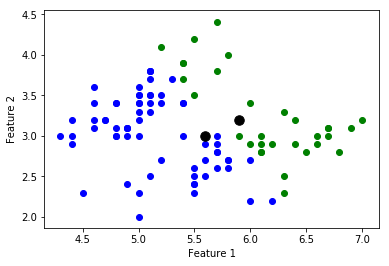

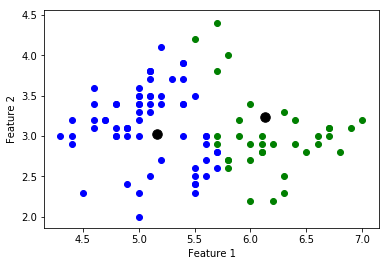

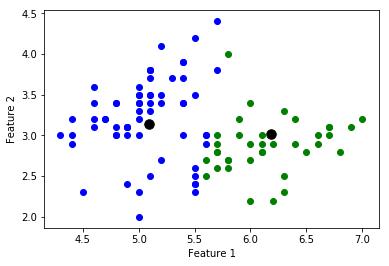

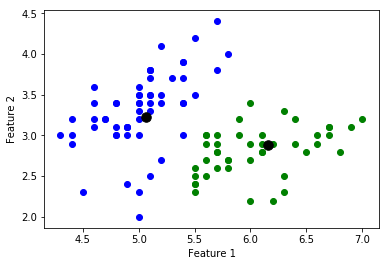

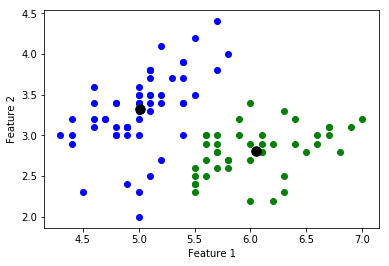

In [28]:
cents,cent_one,cent_two,old_cents = clustering(X)

In [29]:
cents = np.array(cents)
cents.shape

(2, 2)

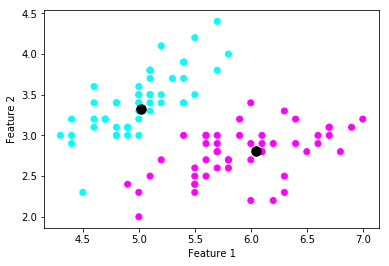

In [30]:
# Visualizing the final Centroids found
plt.scatter(X[:,0],X[:,1],c=y,cmap="cool")
plt.scatter(cents[:,0], cents[:,1],s=90,c="black")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

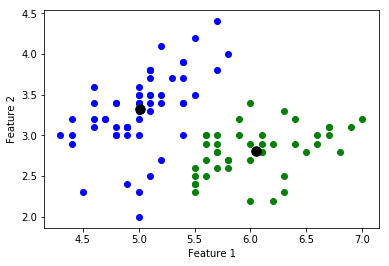

In [31]:
# Visualizing the Centroids found and their corresponding assigned data points 

one = [1 for i in range(len(cent_one))]
two = [0 for i in range(len(cent_two))]
cent_one = np.array(cent_one)
cent_two = np.array(cent_two)

plt.scatter(cent_one[:,0],cent_one[:,1],c="blue")
plt.scatter(cent_two[:,0],cent_two[:,1],c="green")
plt.scatter(cents[:,0], cents[:,1],s=90,c="black")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()